In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import sys

uint8
1024 768


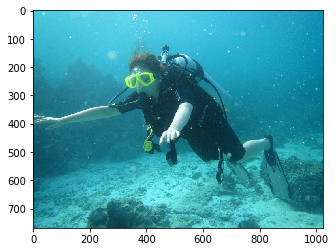

In [2]:
# reading image and its parameters
origImg = cv2.imread('../Raw/6_img_.png')
origImg = cv2.cvtColor(origImg, cv2.COLOR_BGR2RGB)

print(origImg.dtype)

height = origImg.shape[0]
width = origImg.shape[1]
print(width,height)
plt.imshow(origImg)

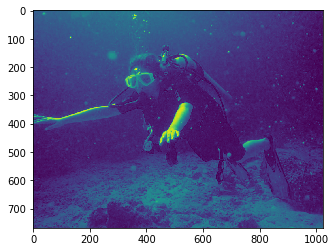

In [3]:
r,g,b = cv2.split(origImg)
plt.imshow(r)
plt.savefig('redOriginal.png',format = "png", dpi = 300)

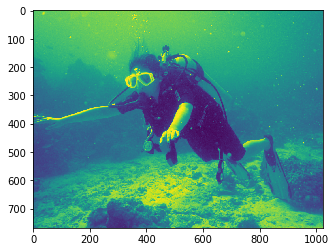

In [4]:
plt.imshow(g)

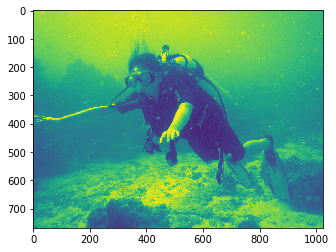

In [5]:
plt.imshow(b)

### White Balancing

In [6]:
#normalising r,g,b to range [0,1]

rW = np.divide(r,255)
gW = np.divide(g,255)
bW = np.divide(b,255)


print("\nmeanRed")
meanRed = np.sum(rW)/rW.size
print(meanRed)
print(np.sum(rW),rW.size)

print("\nmeanGreen")
meanGreen = np.sum(gW)/gW.size
print(meanGreen)
print(np.sum(gW),gW.size)

print("\nmeanBlue")
meanBlue = np.sum(bW)/bW.size
print(meanBlue)
print(np.sum(bW),bW.size)



meanRed
0.17874596290339048
140571.54509803918 786432

meanGreen
0.575418993382672
452527.90980392153 786432

meanBlue
0.636279242023144
500390.3568627452 786432


In [7]:
# compensating red and blue channel

for i in range(height):
    for j in range(width):
        rW[i][j] += (meanGreen - meanRed)*(1-rW[i][j])*gW[i][j]

print(abs(meanBlue-meanGreen))
if(abs(meanBlue-meanGreen) > 0.1):
    for i in range(height):
        for j in range(width):
            bW[i][j] += (meanGreen - meanBlue)*(1-bW[i][j])*gW[i][j]

0.060860248640472014


In [8]:
# # de-normalising data
# rW = np.array(rW)*255
# gW = np.array(gW)*255
# bW = np.array(bW)*255

# # print(bW)

# rW = np.around(rW)
# rW = rW.astype(np.uint8)

# gW = np.around(gW)
# gW = gW.astype(np.uint8)

# bW = np.around(bW)
# bW = bW.astype(np.uint8)

In [9]:
AfterComp = cv2.merge((rW,gW,bW))

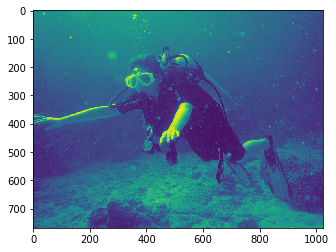

In [10]:
plt.imshow(rW)
plt.savefig('redCompensated.png',format = "png", dpi = 300)

# print(rW)

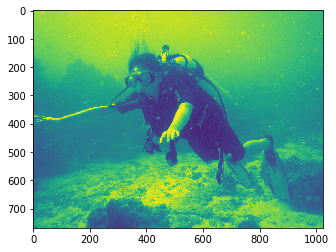

In [11]:
plt.imshow(bW)

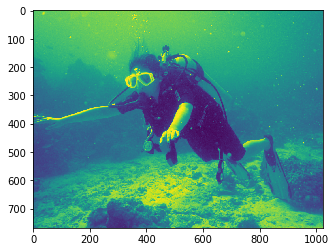

In [12]:
plt.imshow(gW)

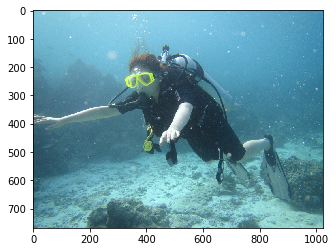

In [13]:
plt.imshow(AfterComp)

In [14]:
def GrayWorld(img,rF,gF,bF):

    # Applying gray world on image

    scale = np.sum(img)/np.size(img)
    print(scale)

    redM = np.sum(rF)/rF.size
    greenM = np.sum(gF)/gF.size
    blueM = np.sum(bF)/bF.size


    rF = np.array(rF)* scale / redM
    gF = np.array(gF)* scale / greenM
    bF = np.array(bF)* scale / blueM
    

#     rF = np.around(rF)
#     rF = rF.astype(np.uint16)
    
    print(rF.min())
    print(rF.max())
    print(rF)
#     print(rF)

#     gF = np.around(gF)
#     gF = gF.astype(np.uint16)

#     bF = np.around(bF)
#     bF = bF.astype(np.uint16)

    AfterGrayWorld = cv2.merge((rF,gF,bF))
    
    return AfterGrayWorld

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.523587074101307
0.08166073257617483
1.4582039731371406
[[0.75936522 0.75383358 0.75383358 ... 0.4201225  0.4201225  0.43758029]
 [0.74828415 0.74828415 0.75383358 ... 0.4201225  0.42664154 0.43108793]
 [0.74828415 0.74828415 0.74828415 ... 0.42664154 0.4242678  0.41774876]
 ...
 [0.54445649 0.49906201 0.47017349 ... 0.83349018 0.82965758 0.82876049]
 [0.52819823 0.47789479 0.44148341 ... 0.85546416 0.82965758 0.81903907]
 [0.51745518 0.46238512 0.44345821 ... 0.87862124 0.85447812 0.82965758]]


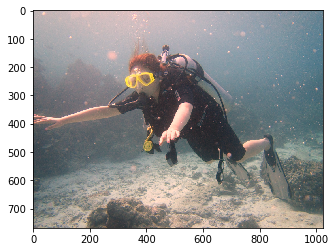

In [15]:
whiteBalanced = GrayWorld(AfterComp,rW,gW,bW)
# whiteBalanced = np.array(whiteBalanced)
plt.imshow(whiteBalanced)
plt.savefig('whiteBalance.png',format = "png", dpi = 300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.4634813994364021
0.0
2.5929614963494694
[[0.79314116 0.78297269 0.78297269 ... 0.22370648 0.22370648 0.25421191]
 [0.77280421 0.77280421 0.78297269 ... 0.22370648 0.23387496 0.24404343]
 [0.77280421 0.77280421 0.77280421 ... 0.23387496 0.22370648 0.21353801]
 ...
 [0.47791839 0.41690753 0.38640211 ... 0.93549983 0.92533136 0.91516288]
 [0.45758144 0.38640211 0.33555972 ... 0.98634222 0.92533136 0.9049944 ]
 [0.43724449 0.35589668 0.33555972 ... 1.0371846  0.97617374 0.92533136]]


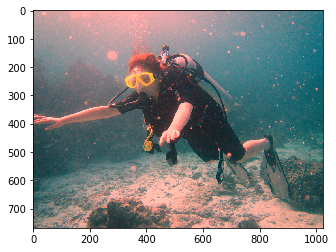

In [16]:
r = np.divide(r,255)
g = np.divide(g,255)
b = np.divide(b,255)

origImg = cv2.merge((r,g,b))
DirectGrayWorld = GrayWorld(origImg,r,g,b)
plt.imshow(DirectGrayWorld)
plt.savefig('DirectGrayWorld.png',format = "png", dpi = 300)

### Gamma correction and unsharp masking 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


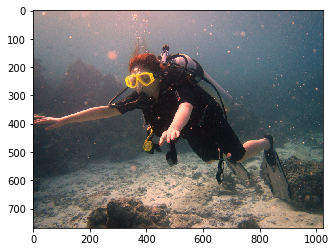

In [24]:
# gamma correction
gamma = 1.5
gammaCorrected = np.copy(whiteBalanced)
for i in range(height):
    for j in range(width):
        gammaCorrected[i][j] = (whiteBalanced[i][j])**gamma  #/255.0)**gamma * 255
# gammaCorrected = gammaCorrected.astype(np.uint8)
plt.imshow(gammaCorrected)

In [25]:
# traditional unsharped masking
def tradUnsharpMask(whiteBalanced):
    blur = cv2.GaussianBlur(whiteBalanced,(5,5),0)     # (I*G)
    temp = np.subtract(whiteBalanced,blur)             # (I - I*G)
    
    Traditional_unsharp_masking = np.add(whiteBalanced,temp)  # I + (I - I*G)
    plt.imshow(Traditional_unsharp_masking)
    return Traditional_unsharp_masking

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


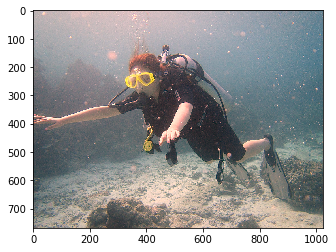

In [27]:
# print(whiteBalanced)
# whiteBalanced = np.array(whiteBalanced,dtype = np.uint8)
Traditional_unsharp_masking = tradUnsharpMask(whiteBalanced)#.astype(np.uint8))

In [28]:
#histogram stretch
def histogramStretch(channel):
    minval = channel.min()
    maxval = channel.max()
    
#     minval = 0.0
#     maxval = 1.0
    
    for i in range(channel.shape[0]):
        for j in range(channel.shape[1]):
            channel[i][j] = (channel[i][j] - minval)/(maxval - minval)# * 255
    return channel#.astype(np.uint8)

In [34]:
#normalised unsharp masking
def NormUnsharpMask(whiteBalanced):
    blur = cv2.GaussianBlur(whiteBalanced,(5,5),0)     # (I*G)
    temp = np.subtract(whiteBalanced,blur)             # (I - I*G)
    
    # histogram stretching
    
    red,green,blue = cv2.split(temp)
    red = histogramStretch(red)
    green = histogramStretch(green) 
    blue = histogramStretch(blue)
    
       
    tempLinearOperatorzied = cv2.merge((red,green,blue))              # N(I - I*G)
#     HLS = cv2.cvtColor(temp, cv2.COLOR_RGB2HLS)
#     h,s,i = cv2.split(HLS)
#     h = histogramStretch(h)
#     s = histogramStretch(s)
#     i = histogramStretch(i)
#     HSI = cv2.merge((h,s,i))
#     tempLinearOperatorzied = cv2.cvtColor(HSI, cv2.COLOR_HLS2RGB)
      
    Normalized_unsharp_masking = np.add(whiteBalanced,tempLinearOperatorzied) # I + N(I - I*G)
    Normalized_unsharp_masking =np.divide(Normalized_unsharp_masking,2)#.astype(np.uint8)       # (I + N(I - I*G))/2
    
    plt.imshow(Normalized_unsharp_masking)
    return Normalized_unsharp_masking

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


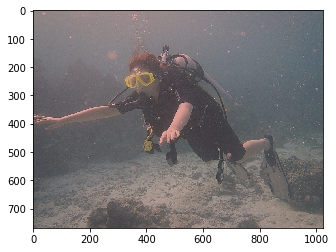

In [35]:
Normalized_unsharp_masked_image = NormUnsharpMask(whiteBalanced)#.astype(np.uint8))

## Laplacian, Saliency and Saturation weights 

In [68]:
def LaplacianContrastWeight(inputImg):
    blur = cv2.GaussianBlur(inputImg,(3,3),0)
    gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
    # Apply Laplace function
    ddepth = cv2.CV_16S
    lap = cv2.Laplacian(gray,ddepth,ksize=3)
    # converting back to uint8
#     lap = cv2.convertScaleAbs(lap)
    return lap

In [69]:
WL1 = LaplacianContrastWeight(gammaCorrected.astype(np.float32))
plt.imshow(WL1)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/filter.simd.hpp:3110: error: (-215:Assertion failed) cn == CV_MAT_CN(dstType) && ddepth >= sdepth in function 'getLinearFilter'


In [62]:
WL2 = LaplacianContrastWeight(Normalized_unsharp_masked_image.astype(np.float32))
plt.imshow(WL2)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/filter.simd.hpp:3110: error: (-215:Assertion failed) cn == CV_MAT_CN(dstType) && ddepth >= sdepth in function 'getLinearFilter'


In [79]:
# saliency

def saliency(inputImg):
    
    inputImg = cv2.cvtColor(inputImg, cv2.COLOR_RGB2GRAY)
        
    blur_filter = [1,4,6,4,1]
    blur_filter = np.matrix(blur_filter)
    blur_filter = np.divide(blur_filter,16.0)#.astype(np.uint8)
    print(blur_filter.shape)
    
    image_blurX = np.zeros((inputImg.shape))         
  
    image_blurX = cv2.filter2D(inputImg, -1, blur_filter)
#     print()
#     image_blurX = np.divide(image_blurX,16.0).astype(np.uint8)
    
    blur_filter = np.transpose(blur_filter)
    print(blur_filter.shape)
    
    image_blurY = cv2.filter2D(image_blurX, -1, blur_filter)
    image_blurY = np.divide(image_blurY,16.0)#.astype(np.uint8)
    
    
    print(np.array_equal(image_blurX,image_blurY))
    
    Saliency = np.subtract(inputImg,image_blurY)
    Saliency = np.abs(Saliency)
    
#     Saliency = np.around(Saliency)
    
    print(Saliency)
    
    return Saliency#.astype(np.uint8)

(1, 5)
(5, 1)
False
[[0.6069184  0.6029665  0.6028912  ... 0.40554762 0.40545058 0.4157519 ]
 [0.5990944  0.5990708  0.6029276  ... 0.4055156  0.40934494 0.41181305]
 [0.59904844 0.5990574  0.59904534 ... 0.4084528  0.41085097 0.40780365]
 ...
 [0.42781165 0.39653552 0.375367   ... 0.6435983  0.64259994 0.64655703]
 [0.4193758  0.38555783 0.36373344 ... 0.6549928  0.6423059  0.6346234 ]
 [0.41633126 0.38132435 0.36798868 ... 0.66935354 0.6590313  0.64237916]]
(768, 1024)


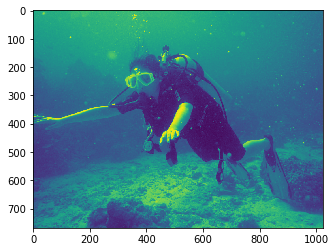

In [82]:
# i = cv2.imread('../Raw/6_img_.png')
# i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
# a,b,c = cv2.split(i)
# a = np.divide(a,255)
# b = np.divide(b,255)
# c = np.divide(c,255)
# i = cv2.merge((a,b,c))



# WS1 = saliency(i.astype(np.float32))
# print(WS1.shape)
# plt.imshow(WS1)

WS1 = saliency(gammaCorrected.astype(np.float32))
print(WS1.shape)
plt.imshow(WS1)

(1, 5)
(5, 1)
False
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


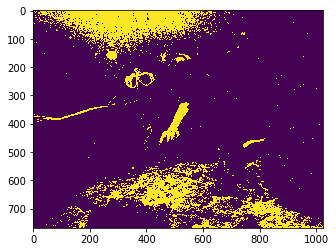

In [63]:
WS2 = saliency(Normalized_unsharp_masked_image.astype(np.float32))
plt.imshow(WS2)

In [ ]:
def saturation(inputImg):
    R,G,B = cv2.split(inputImg)
    L = cv2.cvtColor(inputImg, cv2.COLOR_RGB2GRAY)
    Wsat = np.zeros((L.shape))
    for i in range(inputImg.shape[0]):
        for j in range(inputImg.shape[1]):
            Wsat[i][j] = math.sqrt(((R[i][j]-L[i][j])**2 + (G[i][j]-L[i][j])**2 + (B[i][j]-L[i][j])**2 )/3)#
    return Wsat#.astype(np.uint8)

In [ ]:
Wsat1 = saturation(gammaCorrected)
plt.imshow(Wsat1)

In [ ]:
Wsat2 = saturation(Normalized_unsharp_masked_image)
plt.imshow(Wsat2)

In [ ]:
Wk1 = np.add(WL1,WS1,Wsat1)
Wk2 = np.add(WL2,WS2,Wsat2)

Wk1t = np.add(Wk1,0.1)
Wk2t = np.add(Wk2,0.2)

Wkall = np.add(Wk1t,Wk2t)

In [ ]:
Wk1_ =  np.divide(np.add(Wk1,0.1),Wkall)
Wk2_ =  np.divide(np.add(Wk2,0.1),Wkall)

In [ ]:
print(Wk1_)
print(Wk1_.min())
print(Wk1_.max())
plt.imshow(Wk1_)

In [ ]:
print(Wk2_.min())
print(Wk2_.max())
plt.imshow(Wk2_)

## Fusion

In [ ]:
# Naive fusion
def naiveFusion(Wk1_,Wk2_,gammaCorrected,Normalized_unsharp_masked_image):
    
    nv1 = np.zeros((gammaCorrected.shape))
    for i in range(gammaCorrected.shape[0]):
        for j in range(gammaCorrected.shape[1]):
            nv1[i][j][0] = gammaCorrected[i][j][0] * Wk1_[i][j]
            nv1[i][j][1] = gammaCorrected[i][j][1] * Wk1_[i][j] 
            nv1[i][j][2] = gammaCorrected[i][j][2] * Wk1_[i][j]
     
    nv2 = np.zeros((Normalized_unsharp_masked_image.shape))
    for i in range(Normalized_unsharp_masked_image.shape[0]):
        for j in range(Normalized_unsharp_masked_image.shape[1]):
            nv2[i][j][0] = Normalized_unsharp_masked_image[i][j][0] * Wk2_[i][j]
            nv2[i][j][1] = Normalized_unsharp_masked_image[i][j][1] * Wk2_[i][j] 
            nv2[i][j][2] = Normalized_unsharp_masked_image[i][j][2] * Wk2_[i][j]                
    
#     nv1 = np.multiply(Wk1_,gammaCorrected)
#     nv2 = np.multiply(Wk2_,Normalized_unsharp_masked_image)

#     nv = np.add(nv1.astype(np.uint8),nv2.astype(np.uint8))
    nv = np.add(nv1,nv2)
    plt.imshow(nv)
    plt.savefig('NaiveFusion.png',format = "png", dpi = 300)

In [ ]:
naiveFusion(Wk1_,Wk2_,gammaCorrected,Normalized_unsharp_masked_image)